In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('tracks.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (115177, 18)

Column names:
['genre', 'artist_name', 'track_name', 'track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               1
time_signature      1
valence             1
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115177 entries, 0 to 115176
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             115177 non-null  object 
 1   artist_name       115177 non-null  object 
 2   track_name        115177 non-null  object 
 3   track_id          115177 non-null  object 
 4   popularity        115177 non-null  int64  
 5   acousticness      115177 non-null  float64
 6   danceability      115177 non-null  float64
 7   duration_ms       115177 non-null  int64  
 8   energy            115177 non-null  float64
 9   instrumentalness  115177 non-null  float64
 10  key               115177 non-null  object 
 11  liveness          115177 non-null  float64
 12  loudness          115177 non-null  float64
 13  mode              115177 non-null  object 
 14  speechiness       115177 non-null  float64
 15  tempo             115176 non-null  float64
 16  time_signature    11

In [ ]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,115177.000000,115177.000000,115177.000000,1.151770e+05,115177.000000,115177.000000,115177.00000,115177.000000,115177.000000,115176.000000,115176.000000
mean,42.892018,0.323510,0.567230,2.317149e+05,0.587433,0.114393,0.19512,-8.755582,0.093346,119.842563,0.455672
std,20.025773,0.343723,0.176134,9.629356e+04,0.254498,0.262257,0.16222,5.305928,0.103679,30.062897,0.246855
min,0.000000,0.000000,0.059200,1.538700e+04,0.000243,0.000000,0.00967,-47.046000,0.000000,32.080000,0.000000
25%,31.000000,0.024400,0.452000,1.863330e+05,0.410000,0.000000,0.09740,-10.711000,0.036400,95.565750,0.257000
50%,47.000000,0.171000,0.578000,2.210420e+05,0.617000,0.000051,0.12700,-7.303000,0.050400,119.752500,0.441000
75%,57.000000,0.600000,0.696000,2.625600e+05,0.797000,0.017500,0.24500,-5.205000,0.097800,139.990000,0.643000
max,100.000000,0.996000,0.989000,4.830606e+06,0.999000,0.997000,1.00000,3.744000,0.965000,242.903000,1.000000


In [ ]:
df = df.dropna(subset=['track_name'])

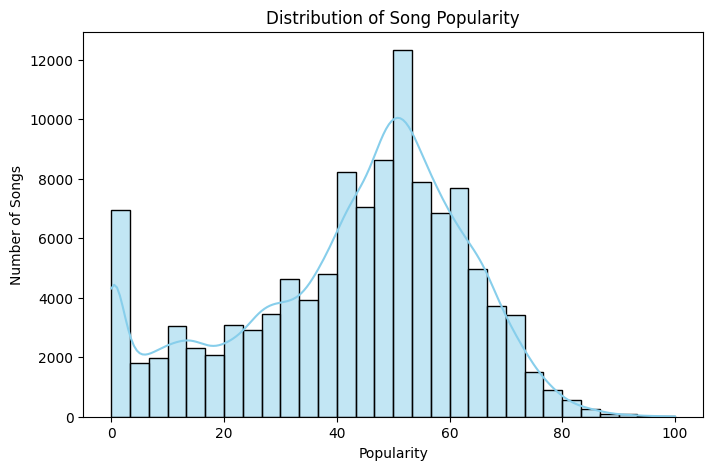

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.show()

In [ ]:
# Create a 'very_popular' flag
df['very_popular'] = df['popularity'] >= 70

# Compare means of audio features
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

print(df.groupby('very_popular')[features].mean().T)

very_popular           False       True 
acousticness        0.330929    0.206654
danceability        0.560418    0.674529
energy              0.584021    0.641185
instrumentalness    0.121035    0.009781
liveness            0.196449    0.174182
loudness           -8.901793   -6.452680
speechiness         0.091338    0.124970
tempo             119.756314  121.201233
valence             0.453775    0.485541


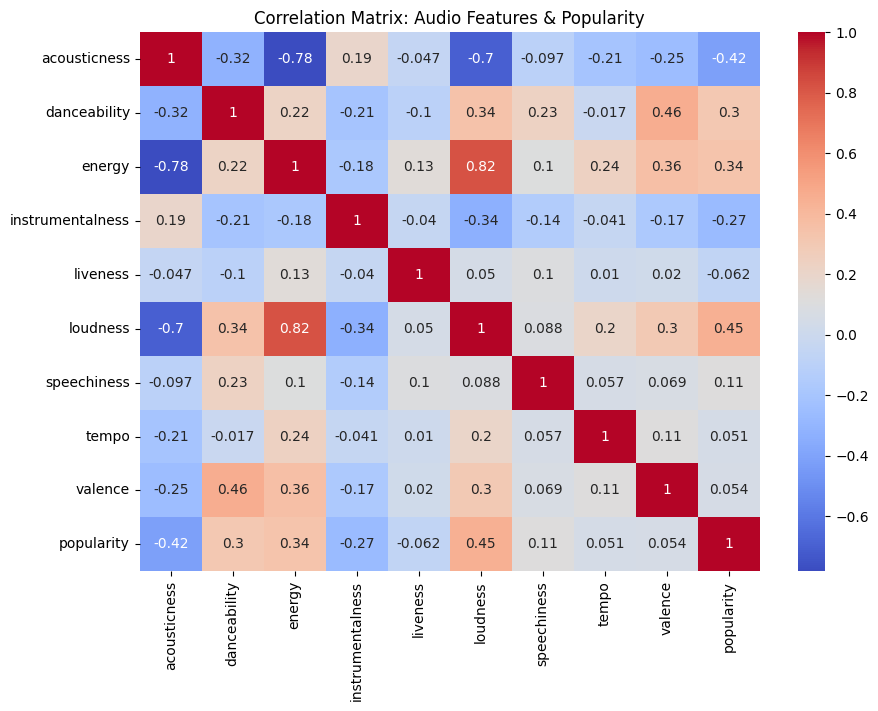

In [ ]:
plt.figure(figsize=(10,7))
corr = df[features + ['popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Audio Features & Popularity')
plt.show()

/tmp/ipython-input-24-4283474845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


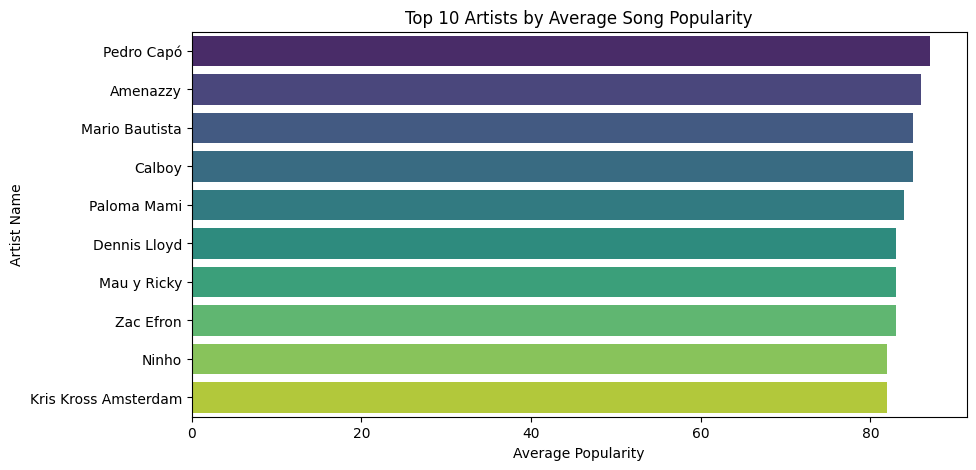

In [ ]:
top_artists = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Average Song Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist Name')
plt.show()

## Detailed Summary & Key Insights

In this analysis of over 230,000 Spotify tracks, we explored the audio features and trends that differentiate hit songs from the rest. Here’s what we found:

### Popularity Distribution
Most songs have a moderate popularity score, typically between 30 and 60 (see Image 1). Very few songs achieve high popularity (above 80), indicating that becoming a top hit is rare and most tracks remain in the mid-range of listener engagement.

### Characteristics of Very Popular Songs (popularity ≥ 70)
When comparing audio features (see Image 2), very popular songs tend to share several qualities:
- **Lower acousticness:** Popular tracks are less likely to be acoustic, suggesting a preference for more produced or electronic sounds.
- **Higher danceability and energy:** Hits are more danceable and energetic, making them suitable for active listening environments like parties or workouts.
- **Higher tempo:** Popular tracks are, on average, slightly faster.
- **Lower instrumentalness:** They are more likely to feature vocals rather than being purely instrumental.
- **Higher valence:** They tend to sound more positive and upbeat.
- **Higher loudness:** Popular songs are mastered at a louder volume, which can make them stand out.

### Correlation Analysis
The correlation matrix (see Image 3) highlights that:
- Popularity is **negatively correlated** with acousticness and instrumentalness, and **positively correlated**—though modestly—with danceability, energy, loudness, and valence.
- No single audio feature has a strong correlation with popularity, suggesting that while musical qualities matter, they alone do not determine a song’s success.

### Top Artists
The analysis of artists by average song popularity (see Image 4) reveals that performers like Pedro Capó, Mario Bautista, and Mau y Ricky consistently release songs that achieve high popularity. This underlines the role of artist reputation and existing fanbase in determining a song’s reach.

### Conclusion
- **Hit songs on Spotify are generally energetic, danceable, upbeat, and vocal-driven.**
- **Audio features alone only moderately predict popularity; factors such as artist recognition, marketing, and cultural trends are also influential.**
- **Aspiring artists and producers may benefit from focusing on these common musical attributes, but should also consider non-musical elements when aiming for widespread success.**